# 1. Regiões recortadas

Neste notebook, será feito a separação do conjunto de teste e treinamento a partir da base inicial. Em seguida, as regiões de interesse serão recortadas, inicialmente em dimensões distintas.

In [1]:
# Importacao de bibliotecas
import json
import os
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [7]:
# Caminhos utilizados para acessar ou salvar arquivos
caminho_rotulos_iniciais = "/home/giovanni/Projetos/Local/TCC/Datasets/Train/labels_v1.2.json"
caminho_imagens_iniciais = "/home/giovanni/Projetos/Local/TCC/Datasets/Train/Images"

caminho_rotulos_treinamento_iniciais = "/home/giovanni/Projetos/Local/TCC/Datasets/Train/rotulos_treinamento.json"
caminho_rotulos_teste_iniciais = "/home/giovanni/Projetos/Local/TCC/Datasets/Train/rotulos_teste.json"

caminho_regioes_rotulos = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes"
caminho_regioes_treinamento = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes/Treinamento"
caminho_regioes_teste = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes/Teste"

## 1.1. Separação das imagens de treinamento e teste

Um novo arquivo .json será criado para os arquivos de treinamento e teste. Além disso, será feito também um tratamento do parâmetro "conditions" de cada região de interesse, responsável por fazer a rotulação da classificação.

In [3]:
# Abertura de arquivo de rotulos do dataset, e separacao do conjunto de treinamento e teste
with open(caminho_rotulos_iniciais, 'r') as arquivo:
    dados_json = json.load(arquivo)

In [4]:
# Loop através de cada entrada no dicionario dados_json
for entrada in dados_json:
    nome_arquivo = entrada['filename']
    objetos = entrada['Labels']['objects']
    
    # Loop através de cada objeto em 'objects'
    for obj in objetos:
        conditions = obj.get('conditions', {})  # Condições podem não estar presentes
        
        if conditions:
            if conditions == {"No issues": "No issues"}:
                obj['conditions'] = 'No issues'
            elif conditions == {"glaze": "Flashover damage"}:
                obj['conditions'] = 'Flashover damage'
            elif conditions == {"shell": "Broken"}:
                obj['conditions'] = 'Broken'
            elif conditions == {"notbroken-notflashed": "notbroken-notflashed"}:
                obj['conditions'] = 'No issues'
            else:
                print(f"Unknown condition: {conditions}")

In [5]:
dados_treinamento, dados_teste = train_test_split(dados_json, test_size=0.2, random_state=42)

arq_rotulos_treinamento = open(caminho_rotulos_treinamento_iniciais, "w")
json.dump(dados_treinamento, arq_rotulos_treinamento, indent = 4)

arq_rotulos_teste = open(caminho_rotulos_teste_iniciais, "w")
json.dump(dados_teste, arq_rotulos_teste, indent = 4)

## 1.2. Recorte das regiões de interesse

A partir da separação dos dados de treinamento e teste na seção anterior, agora serão efetuadas a separação das regiões de interesse (bboxes) em novas imagens. Também será implementado tanto para o teste quanto para o treinamento, uma rotulação simplificada das regiões de interesse, contendo apenas o nome da região, e sua classificação.

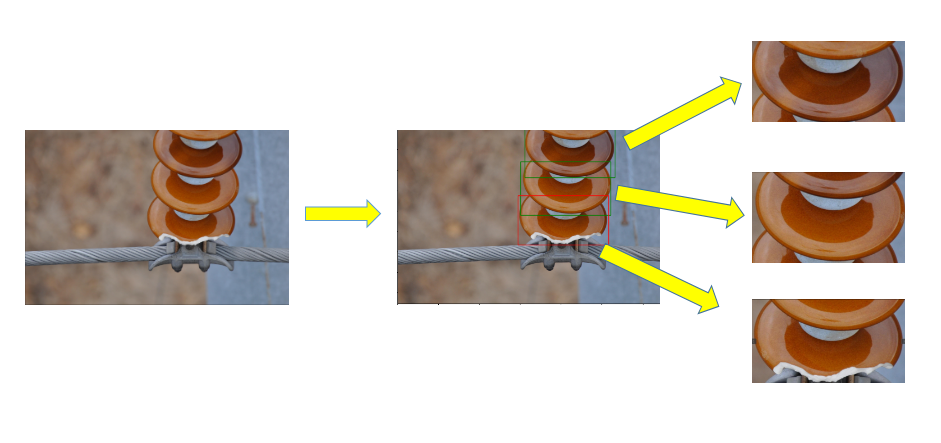

In [15]:
# Recorte das imagens de treinamento

contador = 0
dicionario_rotulos_regioes_treinamento = []

for entrada in dados_treinamento:
    nome_arquivo = entrada['filename']
    objetos = entrada['Labels']['objects']

    for obj in objetos:
        classificacao = obj.get('conditions', {})
        
        # Se a regiao tiver uma classificacao, eu executo o recorte
        if classificacao:
            nome_imagem = f'{contador}_{nome_arquivo}'
            regiao = obj['bbox']
            
            caminho_abertura = os.path.join(caminho_imagens_iniciais, nome_arquivo)
            imagem = Image.open(caminho_abertura)

            # Recorte da regiao especificada pelo parametro bbox
            regiao = imagem.crop((regiao[0], regiao[1], regiao[0] + regiao[2], regiao[1] + regiao[3]))

            # Salvando a regiao recortada
            nome_img_saida = f'{contador}_{nome_arquivo}'
            saida = os.path.join(caminho_regioes_treinamento, nome_img_saida)
            regiao.save(saida)

            # Salvando informacoes no dicionario
            dicionario_rotulos_regioes_treinamento.append({
                'nome': nome_img_saida,
                'classificacao': classificacao
            })

            contador = contador + 1

# Salvando os rotulos das novas imagens geradas
rotulos_regioes_treinamento = os.path.join(caminho_regioes_rotulos, "rotulos_regioes_treinamento.json")

arquivo_treinamento_final = open(rotulos_regioes_treinamento, "w")
json.dump(dicionario_rotulos_regioes_treinamento, arquivo_treinamento_final, indent = 4)

In [16]:
# Recorte das imagens de teste

contador = 0
dicionario_rotulos_regioes_teste = []

for entrada in dados_teste:
    nome_arquivo = entrada['filename']
    objetos = entrada['Labels']['objects']

    for obj in objetos:
        classificacao = obj.get('conditions', {})
        
        # Se a regiao tiver uma classificacao, eu executo o recorte
        if classificacao:
            nome_imagem = f'{contador}_{nome_arquivo}'
            regiao = obj['bbox']
            
            caminho_abertura = os.path.join(caminho_imagens_iniciais, nome_arquivo)
            imagem = Image.open(caminho_abertura)

            # Recorte da regiao especificada pelo parametro bbox
            regiao = imagem.crop((regiao[0], regiao[1], regiao[0] + regiao[2], regiao[1] + regiao[3]))

            # Salvando a regiao recortada
            nome_img_saida = f'{contador}_{nome_arquivo}'
            saida = os.path.join(caminho_regioes_teste, nome_img_saida)
            regiao.save(saida)

            # Salvando informacoes no dicionario
            dicionario_rotulos_regioes_teste.append({
                'nome': nome_img_saida,
                'classificacao': classificacao
            })

            contador = contador + 1

# Salvando os rotulos das novas imagens geradas
rotulos_regioes_teste = os.path.join(caminho_regioes_rotulos, "rotulos_regioes_teste.json")

arquivo_teste_final = open(rotulos_regioes_teste, "w")
json.dump(dicionario_rotulos_regioes_teste, arquivo_teste_final, indent = 4)